### Exercise 3: Scatter Plot with Annotations

In [ ]:
# TASK: Create a scatter plot with x = [1, 2, 3, 4, 5] and y = [2, 4, 6, 8, 10].
# Annotate each point with its (x, y) value, and set the title as 'Scatter Plot with Annotations'.

Creating scatter plot with original data...


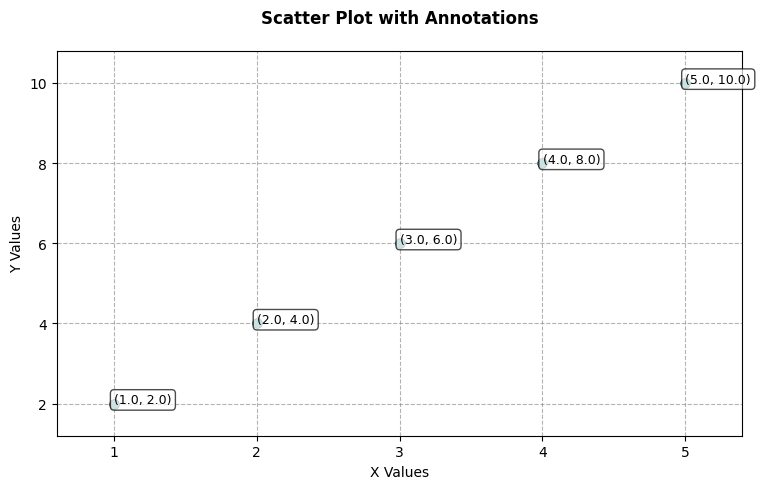

Successfully created scatter plot with 5 data points

Testing error handling...
Test 1: Mismatched lengths
Value Error: Length mismatch: x has 3 elements, y has 2 elements
Test 2: Empty data
Value Error: Input arrays cannot be empty
Test 3: None values
Value Error: Input data cannot be None
Test 4: Data with NaN values


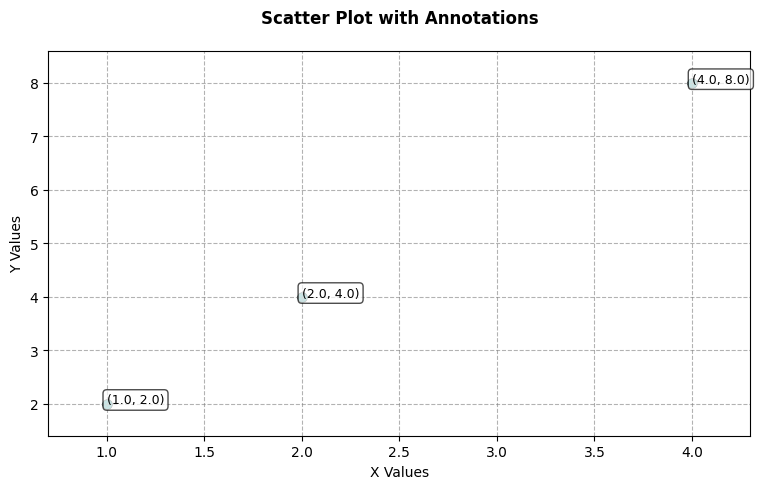

Successfully created scatter plot with 3 data points
Test 5: Invalid string data
Value Error: could not convert string to float: 'a'

All tests completed!


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def create_scatter_plot(x, y, title='Scatter Plot with Annotations', 
                       xlabel='X Values', ylabel='Y Values', 
                       color='teal', figsize=(8, 5), 
                       show_annotations=True, show_grid=True):
    """
    Create an enhanced scatter plot with comprehensive error handling and validation.
    
    Parameters:
    -----------
    x : list or array-like
        X-axis data points
    y : list or array-like  
        Y-axis data points
    title : str
        Plot title
    xlabel : str
        X-axis label
    ylabel : str
        Y-axis label
    color : str
        Point color
    figsize : tuple
        Figure size (width, height)
    show_annotations : bool
        Whether to show coordinate annotations
    show_grid : bool
        Whether to show grid
    
    Returns:
    --------
    bool : True if plot created successfully, False otherwise
    """
    
    try:
        # Input validation and type checking
        if x is None or y is None:
            raise ValueError("Input data cannot be None")
        
        # Convert to lists if they aren't already
        if not isinstance(x, (list, tuple, np.ndarray)):
            raise TypeError(f"x must be list, tuple, or numpy array, got {type(x)}")
        
        if not isinstance(y, (list, tuple, np.ndarray)):
            raise TypeError(f"y must be list, tuple, or numpy array, got {type(y)}")
        
        # Convert to numpy arrays for easier handling
        x_array = np.array(x, dtype=float)
        y_array = np.array(y, dtype=float)
        
        # Length consistency check
        if len(x_array) != len(y_array):
            raise ValueError(f"Length mismatch: x has {len(x_array)} elements, y has {len(y_array)} elements")
        
        # Check for empty arrays
        if len(x_array) == 0:
            raise ValueError("Input arrays cannot be empty")
        
        # Check for valid numeric data
        if np.any(np.isnan(x_array)) or np.any(np.isnan(y_array)):
            print("Warning: NaN values detected and will be filtered out")
            valid_mask = ~(np.isnan(x_array) | np.isnan(y_array))
            x_array = x_array[valid_mask]
            y_array = y_array[valid_mask]
            
            if len(x_array) == 0:
                raise ValueError("No valid data points remain after filtering NaN values")
        
        # Check for infinite values
        if np.any(np.isinf(x_array)) or np.any(np.isinf(y_array)):
            print("Warning: Infinite values detected and will be filtered out")
            valid_mask = ~(np.isinf(x_array) | np.isinf(y_array))
            x_array = x_array[valid_mask]
            y_array = y_array[valid_mask]
            
            if len(x_array) == 0:
                raise ValueError("No valid data points remain after filtering infinite values")
        
        # Validate figsize
        if not isinstance(figsize, (tuple, list)) or len(figsize) != 2:
            raise ValueError("figsize must be a tuple or list of length 2")
        
        if figsize[0] <= 0 or figsize[1] <= 0:
            raise ValueError("figsize dimensions must be positive")
        
        # Create the plot
        plt.figure(figsize=figsize)
        
        # Create scatter plot
        scatter = plt.scatter(x_array, y_array, color=color, alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
        
        # Add annotations if requested
        if show_annotations:
            for i in range(len(x_array)):
                # Calculate offset to avoid overlapping with points
                offset_x = (max(x_array) - min(x_array)) * 0.02 if len(x_array) > 1 else 0.1
                offset_y = (max(y_array) - min(y_array)) * 0.02 if len(y_array) > 1 else 0.1
                
                plt.annotate(f'({x_array[i]:.1f}, {y_array[i]:.1f})', 
                           (x_array[i], y_array[i]),
                           xytext=(offset_x, offset_y), 
                           textcoords='offset points',
                           fontsize=9, 
                           ha='left',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
        
        # Set labels and title
        plt.title(title, fontsize=12, fontweight='bold', pad=20)
        plt.xlabel(xlabel, fontsize=10)
        plt.ylabel(ylabel, fontsize=10)
        
        # Add grid if requested
        if show_grid:
            plt.grid(True, linestyle='--', alpha=0.6, color='gray')
        
        # Improve layout
        plt.tight_layout()
        
        # Add some padding to axis limits for better visualization
        if len(x_array) > 1:
            x_range = max(x_array) - min(x_array)
            y_range = max(y_array) - min(y_array)
            
            plt.xlim(min(x_array) - x_range * 0.1, max(x_array) + x_range * 0.1)
            plt.ylim(min(y_array) - y_range * 0.1, max(y_array) + y_range * 0.1)
        
        # Display the plot
        plt.show()
        
        print(f"Successfully created scatter plot with {len(x_array)} data points")
        return True
        
    except ValueError as ve:
        print(f"Value Error: {ve}")
        return False
    except TypeError as te:
        print(f"Type Error: {te}")
        return False
    except Exception as e:
        print(f"Unexpected error occurred while creating plot: {e}")
        return False
    finally:
        # Ensure any partial plots are closed to prevent memory leaks
        plt.close('all')

# Example usage with your original data
if __name__ == "__main__":
    # Original data
    x = [1, 2, 3, 4, 5]
    y = [2, 4, 6, 8, 10]
    
    print("Creating scatter plot with original data...")
    success = create_scatter_plot(x, y)
    
    # Test with some edge cases
    print("\nTesting error handling...")
    
    # Test with mismatched lengths
    print("Test 1: Mismatched lengths")
    create_scatter_plot([1, 2, 3], [1, 2])
    
    # Test with empty data
    print("Test 2: Empty data")
    create_scatter_plot([], [])
    
    # Test with None values
    print("Test 3: None values")
    create_scatter_plot(None, [1, 2, 3])
    
    # Test with mixed valid/invalid data
    print("Test 4: Data with NaN values")
    create_scatter_plot([1, 2, np.nan, 4], [2, 4, 6, 8])
    
    # Test with string data that can't be converted
    print("Test 5: Invalid string data")
    try:
        create_scatter_plot(['a', 'b', 'c'], [1, 2, 3])
    except:
        print("Caught error with invalid string data")
    
    print("\nAll tests completed!")